**Throw a dice and get the resultant dice with simulated and quantum computations**

In [1]:
import qiskit
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [2]:
with open('tocken.txt', 'r') as file:
    myTocken = file.read().replace('\n', '')
IBMQ.save_account(myTocken,overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)

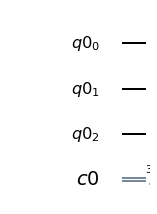

In [4]:
circuit.draw(output='mpl')

Apply Hadamard gate on all the Qbits

In [5]:
for x in range(0, 3):
    circuit.h(qr[x])

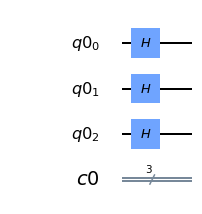

In [6]:
circuit.draw(output='mpl')

In [7]:
circuit.measure(qr, cr)

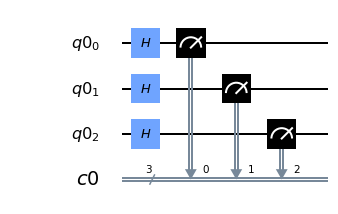

In [8]:
circuit.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator,shots=1) #run the dice once
resultSimulated = execute(circuit, backend=simulator).result()

In [10]:
print(resultSimulated.get_counts(circuit))

{'110': 127, '010': 132, '100': 117, '000': 129, '011': 133, '101': 130, '001': 133, '111': 123}


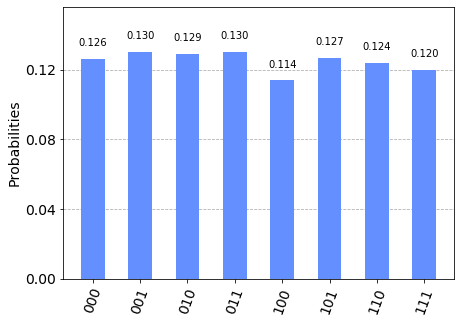

In [11]:
plot_histogram(resultSimulated.get_counts(circuit))

Now, lets run it on IBMQ

In [12]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)

In [13]:
job_monitor(job)

Job Status: job has successfully run


In [14]:
resultFromQC = job.result()

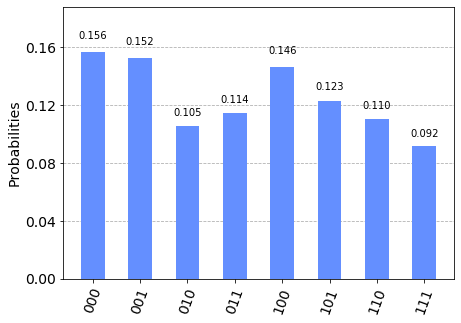

In [15]:
plot_histogram(resultFromQC.get_counts(circuit))

In [16]:
import functools
job_one_shot = execute(circuit, backend=simulator,shots=1)
result_one_shot = job_one_shot.result()
#print(type(result_one_shot))
counts_one_shot = result_one_shot.get_counts(circuit)
#print(counts_one_shot)
one_die_roll_str = list(list(counts_one_shot)[0])
#print(one_die_roll_str)
one_die_roll = [int(x) for x in one_die_roll_str]
#print(one_die_roll)
dice_value = functools.reduce(lambda x, y: 2*x+y,one_die_roll,0) + 1
print("Simulated: The resultant quantum dice roll is", dice_value)

Simulated: The resultant quantum dice roll is 2


In [17]:
q_job_one_shot = execute(circuit, backend=qcomp, shots=1)
job_monitor(q_job_one_shot)
q_result_one_shot = q_job_one_shot.result()
q_counts_one_shot = q_result_one_shot.get_counts(circuit)
q_one_die_roll_str = list(list(q_counts_one_shot)[0])
q_one_die_roll = [int(x) for x in q_one_die_roll_str]
q_dice_value = functools.reduce(lambda x, y: 2*x+y,q_one_die_roll,0) + 1
print("QuantumCalculated: The resultant quantum dice roll is", q_dice_value)

Job Status: job has successfully run
QuantumCalculated: The resultant quantum dice roll is 1


In [18]:
job_monitor(q_job_one_shot)

Job Status: job has successfully run
